# EXERCISE 1

## a.  AVG Time from b to b

To estimate the avg time we simulate 1000 random walks (starting on b and ending on b) basing on the transition rate matrix (normalizing the rows). We calculate the time according to the poisson distribution using the rate of the specific traversed link. 

The function RandomWalk simulates a random walk on the graph G, starting from node xi.  

In [1]:
# Simulates a random walk on the graph G, starting from node xi.
# When the particles return tu xi we stop
# Approach with probability matrix P and rate w[i] for each node
def RandomWalk(xi, till_first_return , w, P):
    # nodeSeq stores the sequence of visited nodes
    nodeSeq = []
    nodeSeq.append(xi)
    total_time = 0
    
    if till_first_return:
        # stores the initial position to check if the 
        # walk returns to it
        x_init = xi
        
        # no upper bound on the number of steps
        while True:
            
            # Compute time
            time_to_next_transition = -np.log(np.random.rand()) / w[xi]   # Generate time to next transition
            
            # Choose the next node based on transition probabilities
            xi = np.random.choice(len(w), p=P[xi])
            
            # Append node to the walk 
            nodeSeq.append(xi)
            
            # Increasing time travelling
            total_time += time_to_next_transition
            
            if xi == x_init:
                return nodeSeq, total_time


Mean time of walk in 1000 cycles:  4.6205618023852875
Last node sequence: ['b', 'o', 'a', 'c', 'd', 'a', 'b']


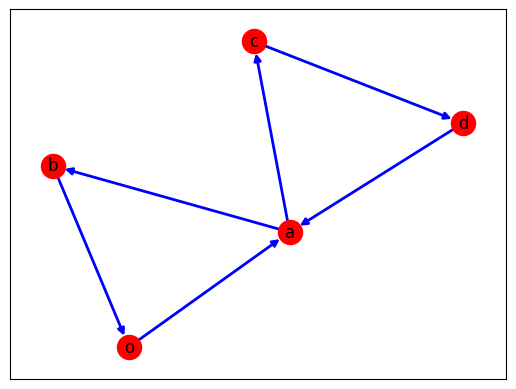

In [3]:
from numpy.random import choice, rand 
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

# node mapping to compute probability basing on int, so for indexing the transition matrix
node_mapping = {
    0: 'o',
    1: 'a',
    2: 'b',
    3: 'c',
    4: 'd'
}

# Transition rate matrix:
Lambda = [
    [0, 2/5, 1/5, 0, 0],
    [0, 0, 3/4, 1/4, 0],
    [1/2, 0, 0, 1/3, 0], # node b corresponds to index = 2
    [0, 0, 1/3, 0, 2/3],
    [0, 1/3, 0, 1/3, 0]
]

#Generate P
Lambda = np.array(Lambda)
w = np.sum(Lambda, axis=1) # Array of the rates
D = np.diag(w)
P = np.linalg.inv(D) @ Lambda

G = nx.DiGraph()
G.add_edges_from([('d','a'),('c','d'),('d','c'),('a','c'),('b','c'),('c','b'),('a','b'),('o','a'),('o','b'),('b','o')])

times = []
i = 10000 # N

# N=1000 random walks starting from 'b' and ending in it to estimate the avg time of all walks
while i>0:
    nodeSeq, total_time = RandomWalk(2, True, w, P) 
    times.append(total_time)
    i = i - 1 
    
times = np.array(times)

# Node sequence of walk
nodeSeq = [node_mapping[node_index] for node_index in nodeSeq]

# Edges sequence of walk
edgeSeq = [(nodeSeq[i-1], nodeSeq[i]) for i in range(1,len(nodeSeq))]

# Draw G and represent the random walk by colouring the edge sequence
pos = nx.spring_layout(G) 
nx.draw_networkx(G, pos, with_labels=True, edgelist = edgeSeq, edge_color='blue', node_color='red', width=2)

print("Mean time of walk in 1000 cycles: ", np.mean(times))
print("Last node sequence:", nodeSeq)

## b. Thoretical return time
In continous time Markov chains Ei[Ti] = 1/(wi*p_bari)

In [24]:
# Theoretical return time in continous case is 1/(w[i]*pi_bar[i])

#Compute pi_bar

w = np.sum(Lambda, axis=1)
w_star = np.max(w)
# compute the off-diagonal part of Q
P_bar = Lambda/w_star 
# add the diagonal part
P_bar = P_bar + np.diag(np.ones(len(w))-np.sum(P_bar,axis=1))

# compute dominant eigenvector
values,vectors = np.linalg.eig(P_bar.T)
index = np.argmax(values.real)
pi_bar = vectors[:,index].real
pi_bar = pi_bar/np.sum(pi_bar)
print("pi_bar=", pi_bar)

#Compute expected return time
return_b = 1/(w[2]*pi_bar[2])
print('Theoretical return time of b =', return_b)

pi_bar= [0.2173913  0.14906832 0.26086957 0.1863354  0.1863354 ]
Theoretical return time of b = 4.599999999999998


## c. AVG time from o to d

We do the same think but starting in o and ending in d modifying the RandomWalk function as below

In [25]:

def RandomWalk(xi, xf, w, P):
    # nodeSeq stores the sequence of visited nodes
    nodeSeq = []
    nodeSeq.append(xi)
    total_time = 0
    # if the walk ends at the first return to xi
        
    # no upper bound on the number of steps
    while True:
            
        # Compute time
        time_to_next_transition = -np.log(np.random.rand()) / w[xi]   # Generate time to next transition
            
            
        # Choose the next node based on transition probabilities
        xi = np.random.choice(len(w), p=P[xi])
            
        # Append node to the walk 
        nodeSeq.append(xi)
            
        # Increasing time travelling
        total_time += time_to_next_transition
            
        if xi == xf:
                return nodeSeq, total_time

Mean time of walk in 1000 cycles:  10.670124250632151
Last node sequence: ['o', 'a', 'b', 'o', 'a', 'b', 'c', 'd']


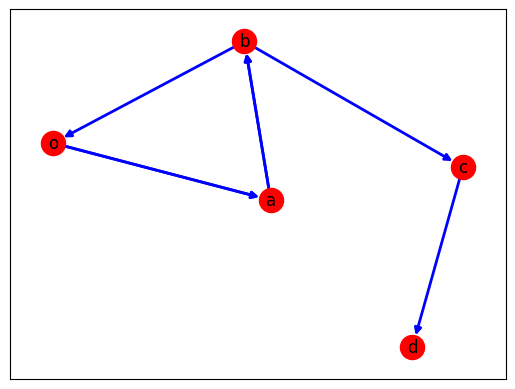

In [26]:
times = []
i = 1000 # N

# N=1000 random walks starting from 'o' and ending in 'd' to estimate the avg time of all walks
while i>0:
    nodeSeq, total_time = RandomWalk(0, 4, w, P) 
    times.append(total_time)
    i = i - 1 
    
times = np.array(times)

# Node sequence of walk
nodeSeq = [node_mapping[node_index] for node_index in nodeSeq]

# Edges sequence of walk
edgeSeq = [(nodeSeq[i-1], nodeSeq[i]) for i in range(1,len(nodeSeq))]

# Draw G and represent the random walk by colouring the edge sequence
pos = nx.spring_layout(G) 
nx.draw_networkx(G, pos, with_labels=True, edgelist = edgeSeq, edge_color='blue', node_color='red', width=2)

print("Mean time of walk in 1000 cycles: ", np.mean(times))
print("Last node sequence:", nodeSeq)

## d. Theoretical time from o to d
Compute all the Hitting Times from i do d solving this sistem:
Ei[Td] = 0 if i=d

Ei[Td] = 1/wi + Summation for all nodes J (Pij*Ej[Td]) if i!=d

In [27]:
n_nodes = len(G.nodes())
def map_node(G,node_id):
    dict_map = {} 
    n_nodes = np.array([0,1,2,3,4])
    for i in range(len(n_nodes)):
        if node_id != n_nodes[i]:
            dict_map[n_nodes[i]] = i
        else:
            a=i
            for j in n_nodes[a+1:]:
                dict_map[j] = i
                i=i+1
            break
    return dict_map
# Compute an array of 1/wi for every node excepted 4
one_div_wi = np.array([1/w[0], 1/w[1], 1/w[2], 1/w[3]])
node_id = 4
S = [node_id] 
R = [node for node in range(n_nodes) if node not in S]

# Restrict P to R x R to obtain hat(P)
hatP = P[np.ix_(R, R)]

# solve the linear system to obtain hat(x)
# np.linalg.solve solves a linear matrix equation given
# the coefficient matrix and the dependent variable values
hatx = np.linalg.solve((np.identity(n_nodes-1)-hatP), one_div_wi)
# map node to position of node in hatx
map = map_node(G,node_id)
print(map_node(G,node_id))
# define the hitting times to the set S
# hitting time is 0 if the starting node is in S
hitting_s = np.zeros(n_nodes)
# hitting time is hat(x) for nodes in R
for r in R:
    hitting_s[r] = hatx[map[r]]

print("hitting times:", hitting_s)
print("\nTheoretical average time from o to d is: ", hitting_s[0])

{0: 0, 1: 1, 2: 2, 3: 3}
hitting times: [10.76666667  9.          9.3         4.1         0.        ]

Theoretical average time from o to d is:  10.766666666666666


## e. French- DeGroot dynamics

We interpret the transition matrix P as the weight matrix of the graph simulation the French DeGroot dynamics with an arbitrary initial condition x(o)

Let $G=(V,E,W)$ be a weighted graph, and $x(t) \in \mathrm{R}^{V}$ denote the state of the nodes of the graph.

The dynamics of $x(t)$ reads

$$
x(t+1) = Px(t),
$$

where $P$ is the normalized adjacency matrix.
Among the applications, the most popular is opinion dynamics, where $x_i$ indicates the opinion of node $i$. This dynamics is known as French - De Groot.

Note that we assume by convention that the opinion of node $i$ is influenced by the opinion of node $j$ if $P_{ij}>0$, i.e., the link $(i,j)$ has to be interpreted as $i$ watching $j$ and updating her opinion based on opinion of $j$.

**Observation**: observe that $\mathbf{1}$ is an equilibrium distribution, since $\mathbf{1} = P \mathbf{1}$ ($P$ is row-stochastic by construction), i.e., consensus distributions are equilibria of the dynamics.

(text of lab 4)

The graph has: 
- period = 1, so it is APERIODIC 
- The condensation graph has 1 sink 
(da verificare) 

THEREFORE THE AGENTS GET TO CONSENSUS

In [110]:
# Normalize P 

P = [
    [0, 2/5, 1/5, 0, 0],
    [0, 0, 3/4, 1/4, 0],
    [1/2, 0, 0, 1/3, 0],
    [0, 0, 1/3, 0, 2/3],
    [0, 1/3, 0, 1/3, 0]
]

W = np.array(P) # convert A to a numpy array
degrees = np.sum(W,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

print("Normalized stochastic matrix: \n")
print(P)
print("\n")
print("STEPS ")

x = np.array([0,1,0,1,0]) # initial condition (initial state of nodes)

x = P @ x
print("x(1):", x.round(2))

x = P @ x
print("x(2):", x.round(2))

x = P @ x
print("x(3):", x.round(2))

x = P @ x
print("x(4):", x.round(2))

x = P @ x
print("x(5):", x.round(2))

x = P @ P @ P @ P @ P @ x
print("x(10):", x.round(2))

x = P @ P @ P @ P @ P @ x
print("x(15):", x.round(2))

x = P @ P @ P @ P @ P @ x
print("x(20):", x.round(2))

x = P @ P @ P @ P @ P @ x
print("x(25):", x.round(2))

x = P @ P @ P @ P @ P @ x
print("x(30):", x.round(2))



Normalized stochastic matrix: 

[[0.         0.66666667 0.33333333 0.         0.        ]
 [0.         0.         0.75       0.25       0.        ]
 [0.6        0.         0.         0.4        0.        ]
 [0.         0.         0.33333333 0.         0.66666667]
 [0.         0.5        0.         0.5        0.        ]]


STEPS 
x(1): [0.67 0.25 0.4  0.   1.  ]
x(2): [0.3  0.3  0.4  0.8  0.12]
x(3): [0.33 0.5  0.5  0.22 0.55]
x(4): [0.5  0.43 0.29 0.53 0.36]
x(5): [0.38 0.35 0.51 0.33 0.48]
x(10): [0.42 0.42 0.4  0.44 0.4 ]
x(15): [0.41 0.41 0.42 0.41 0.42]
x(20): [0.42 0.42 0.41 0.42 0.41]
x(25): [0.42 0.42 0.42 0.42 0.42]
x(30): [0.42 0.42 0.42 0.42 0.42]


### Does the dynamics converge to a consensus state for every initial condition x(0)? Motivate your answer.

The dynamics converges to a consensus for every x(o) since the graph is aperiodic and the corresponding condensantion graph has 1 node (strongly connected)

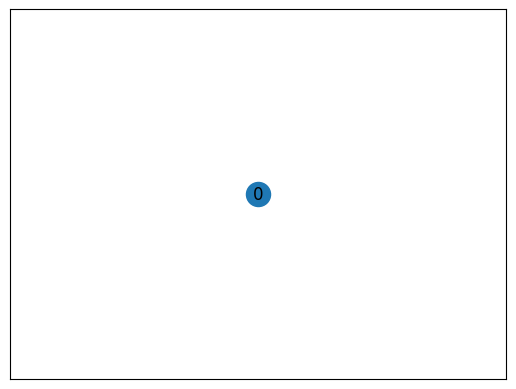

In [21]:
CG = nx.algorithms.components.condensation(G)
nx.draw_networkx(CG)

## f. Initial state as random variables with variance

We compute the mean variance of the consensus:

1) for each run we generate random variables

2) We iterate running the dynamics for 500 steps 

3) we compute the squared error from the mean consensus computed before (0.27)

4) then we calculate the mean of the array of consensus variances 

In [111]:
initial_variances = np.array([1, 1, 1, 2, 2])

num_runs = 200
num_steps = 500

# Calculate the variance of the consensus value over multiple runs
alfa_err = np.zeros(num_runs)

for i in range(num_runs):
    
    # Generate random initial states with specified variances
    x = np.random.randn(P.shape[0]) * np.sqrt(initial_variances)
    
    # Run the dynamics for 500 steps
    for step in range(num_steps):
        x = P @ x
    
    # Calculate the squared error from the consensus value (mu = 0.27)
    alfa_err[i] = (0.27 - np.mean(x)) ** 2


# Calculate the variance of the consensus state
variance_consensus = np.mean(alfa_err)

print("Variance of the node states:", initial_variances)
print("Variance of the consensus state (simulation):", variance_consensus)

Variance of the node states: [1 1 1 2 2]
Variance of the consensus state (simulation): 0.34162206635738884


## g.

Remove the edges (d, a) and (d, c). Describe and motivate the asymptotic behaviour of the
dynamics. If the dynamics converges to a consensus state, how is the consensus value related
to the initial condition x(0)? Assume that the initial state of the dynamics for each node
i ∈ V is given by xi(0) = ξi, where {ξi}i∈V are i.i.d. random variables with variance σ2. Compute analytically the variance of the consensus value.


Normalized stochastic matrix: 

[[0.         0.66666667 0.33333333 0.         0.        ]
 [0.         0.         0.75       0.25       0.        ]
 [1.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         1.        ]
 [0.         0.5        0.         0.5        0.        ]]


STEPS 
x(1): [1.14 0.49 0.71 0.09 0.26]
x(2): [0.56 0.56 1.14 0.26 0.29]
x(3): [0.75 0.92 0.56 0.29 0.41]
x(4): [0.8  0.49 0.75 0.41 0.6 ]
x(5): [0.58 0.66 0.8  0.6  0.45]
x(10): [0.65 0.6  0.69 0.65 0.63]
x(15): [0.66 0.64 0.64 0.64 0.65]
x(20): [0.65 0.65 0.64 0.64 0.65]
x(25): [0.64 0.65 0.64 0.64 0.64]
x(30): [0.64 0.65 0.65 0.65 0.64]
x(35): [0.65 0.65 0.65 0.65 0.65]
x(40): [0.65 0.65 0.65 0.65 0.65]


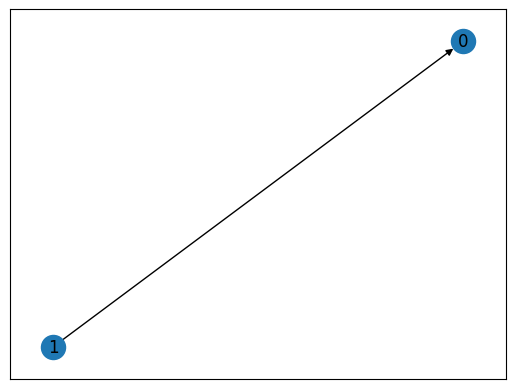

In [114]:
# G.remove_edge('d', 'a')
# G.remove_edge('d', 'c')

CG = nx.algorithms.components.condensation(G)
nx.draw_networkx(CG)

# Transition rate matrix:
P= [
    [0, 2/5, 1/5, 0, 0],
    [0, 0, 3/4, 1/4, 0],
    [1/2, 0, 0, 0, 0],  # We set to 0 the d-c element
    [0, 0, 0, 0, 2/3],  
    [0, 1/3, 0, 1/3, 0]
]

P = np.array(P)

transition_matrix = P

# Normalize P 

W = np.array(P) # convert A to a numpy array
degrees = np.sum(W,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

print("Normalized stochastic matrix: \n")
print(P)
print("\n")
print("STEPS ")

variance = 1

# Generate a list of random variables with specified variance
x = np.random.normal(0, np.sqrt(variance), size=5)

x = P @ x
print("x(1):", x.round(2))

x = P @ x
print("x(2):", x.round(2))

x = P @ x
print("x(3):", x.round(2))

x = P @ x
print("x(4):", x.round(2))

x = P @ x
print("x(5):", x.round(2))

x = P @ P @ P @ P @ P @ x
print("x(10):", x.round(2))

x = P @ P @ P @ P @ P @ x
print("x(15):", x.round(2))

x = P @ P @ P @ P @ P @ x
print("x(20):", x.round(2))

x = P @ P @ P @ P @ P @ x
print("x(25):", x.round(2))

x = P @ P @ P @ P @ P @ x
print("x(30):", x.round(2))

x = P @ P @ P @ P @ P @ x
print("x(35):", x.round(2))

x = P @ P @ P @ P @ P @ x
print("x(40):", x.round(2))

## ANSWER: 

Plotting the condensation graph without the two edges we can see that now we have 2 nodes (source and sink), so by removing the edges we disconnected the previous single connected component in two separate connected components.  

The dynamics is governed by the transition matrix. In this case, the removal of edges alters the paths that the points can take, affecting the convergence behavior.
It seems that the convergence to consesus is slower than in the previous case.
There is more dipendency on the initial conditions.

## h.

Consider the graph (V, E,Λ), and remove the edges (c, b) and (d, a). Analyse the FrenchDeGroot dynamics on the new graph. In particular, describe how the asymptotic behaviour of the dynamics varies in terms of the initial condition x(0), and motivate your answer.

In [ ]:
#G.remove_edge('c', 'b')
#G.remove_edge('d', 'a')

CG = nx.algorithms.components.condensation(G)
nx.draw_networkx(CG)

# Transition rate matrix:
P = [
    [0, 2/5, 1/5, 0, 0],
    [0, 0, 3/4, 0, 0],   # Changed 
    [1/2, 0, 0, 1/3, 0],
    [0, 0, 0, 0, 2/3],   # Changed 
    [0, 1/3, 0, 1/3, 0]
]

P = np.array(P)
transition_matrix = P

# Normalize P 

W = np.array(P) # convert A to a numpy array
degrees = np.sum(W,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

print("Normalized stochastic matrix: \n")
print(P)
print("\n")
print("STEPS ")

# initial condition (initial state of nodes)
x = np.array([0,0,1,0,0])

x = P @ x
print("x(1):", x.round(2))

x = P @ x
print("x(2):", x.round(2))

x = P @ x
print("x(3):", x.round(2))

x = P @ x
print("x(4):", x.round(2))

x = P @ x
print("x(5):", x.round(2))

x = P @ P @ P @ P @ P @ x
print("x(10):", x.round(2))

x = P @ P @ P @ P @ P @ x
print("x(15):", x.round(2))

x = P @ P @ P @ P @ P @ x
print("x(20):", x.round(2))

x = P @ P @ P @ P @ P @ x
print("x(25):", x.round(2))

x = P @ P @ P @ P @ P @ x
print("x(30):", x.round(2))

x = P @ P @ P @ P @ P @ x
print("x(35):", x.round(2))

x = P @ P @ P @ P @ P @ x
print("x(40):", x.round(2))

## ANSWER

We observed that by changing the initial condition we obtained different number of steps to reach the consensus 

# EXERCISE 2

In [4]:
# Simulates a random walk on the graph G, starting from node xi.
# When the particles return tu xi we stop

def RandomWalk(xi, till_first_return , w, P):
    # nodeSeq stores the sequence of visited nodes
    nodeSeq = []
    nodeSeq.append(xi)
    total_time = 0
    
    if till_first_return:
        # stores the initial position to check if the 
        # walk returns to it
        x_init = xi
        
        # no upper bound on the number of steps
        while True:
            
            # Compute time
            time_to_next_transition = -np.log(np.random.rand()) / w[xi]   # Generate time to next transition
            
            # Choose the next node based on transition probabilities
            xi = np.random.choice(len(w), p=P[xi])
            
            # Append node to the walk 
            nodeSeq.append(xi)
            
            # Increasing time travelling
            total_time += time_to_next_transition
            
            if xi == x_init:
                return nodeSeq, total_time


## a. Particle perspective 

1)   If 100 particles all start in node b, what is the average time for a particle to return to
node b?

We do the same thing for 100 particles using the normalized P 

In [6]:
from numpy.random import choice, rand 
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

# node mapping to compute probability basing on int, so for indexing the transition matrix
node_mapping = {
    0: 'o',
    1: 'a',
    2: 'b',
    3: 'c',
    4: 'd'
}

# Transition rate matrix:
Lambda = [
    [0, 2/5, 1/5, 0, 0],
    [0, 0, 3/4, 1/4, 0],
    [1/2, 0, 0, 1/3, 0],
    [0, 0, 1/3, 0, 2/3],
    [0, 1/3, 0, 1/3, 0]
]

Lamda = np.array(Lambda)
w = np.sum(Lambda, axis=1)
D = np.diag(w)
P = np.linalg.inv(D) @ Lambda


#create graph 
G = nx.DiGraph()
G.add_edges_from([('d','a'),('c','d'),('d','c'),('a','c'),('b','c'),('c','b'),('a','b'),('o','a'),('o','b'),('b','o')])

# Simulate 100 particles starting in b ending in b 

times = [] 
i = 100            # Number of particles

# node 1 : node 'b'
while i>0:
    nodeSeq, total_time = RandomWalk(2, True , w, P) 
    times.append(total_time)
    i = i - 1 
    
times = np.array(times)

# Node sequence of walk
nodeSeq = [node_mapping[node_index] for node_index in nodeSeq]

# Edges sequence of walk
edgeSeq = [(nodeSeq[i-1], nodeSeq[i]) for i in range(1,len(nodeSeq))]

print("Mean time of walk for 100 particles: ", np.mean(times))

Mean time of walk for 100 particles:  4.897836350937675


2) How does this compare to the answer in Problem 1, why?

Simulating 100 particles one time is the same of simulating a particles 100 times so the value we expected is the Expected value of the return time of node b.


## b.  Node perspective
The approch we used is not in the hints of the homework: we exploit the property of the Poisson variable whereby time passing does not affect future events.

60.00007190308242


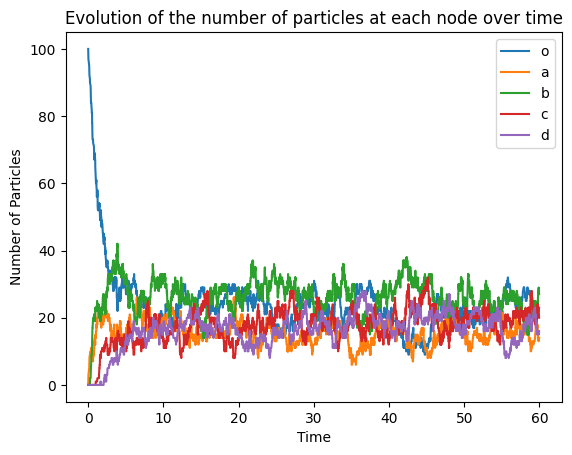

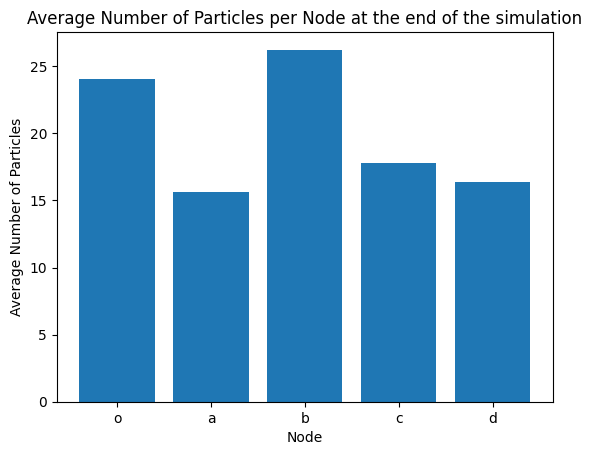

Average number per node :  [24.0141649  15.58731501 26.22135307 17.78816068 16.38900634]


In [7]:
from numpy.random import choice, rand 
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')


# Inizializza i nodi utilizzando il mapping
node_mapping = {
    0: 'o',
    1: 'a',
    2: 'b',
    3: 'c',
    4: 'd'
}

num_particles = [100, 0, 0, 0, 0]
time = 0
time_points = []  # List of temporal points
num_particle_counts = []  # List of the number of particles for every node over time

# Simulating the process using P matrix and w[i]*N rate for every node
while time < 60:
    time_points.append(time)
    num_particle_counts.append(num_particles.copy())
    # list of times for each node proportional to 1/(w[i]*Number of particles in the node)
    random_times = np.array([-np.log(np.random.rand()) / (w[i] * N) if N > 0 else np.inf for (i, N) in enumerate(num_particles)])
    # We take the minimum value and the node link to it, it means that the particle starts from that node
    # We can do that since P(X >= t + s | X >= t) = P(X >= s) for a Poisson Random variable X
    # In practice we take the node that activate the node first and then we reset
    # If the first clock that activates in the imput clock we insert a particle in the Graph
    random_time = min(list(enumerate(random_times)), key=lambda x: x[1]) #  ES : min ([(0,23),(1,40),(2,100)])

    time += random_time[1]
    # subtract a particles from minimum time node
    num_particles[random_time[0]] -= 1
    # Compute the new position
    newpos = np.random.choice(len(w), p= P[random_time[0]])
    # Update the number of particles of the node
    num_particles[newpos] += 1



time_points = np.array(time_points)
num_particle_counts = np.array(num_particle_counts)
print(time)
node_order = ['o', 'a', 'b', 'c', 'd']

for i, node_name in enumerate(node_order):
    plt.plot(time_points, num_particle_counts[:, i], label=node_name)

plt.xlabel('Time')
plt.ylabel('Number of Particles')
plt.legend()
plt.title('Evolution of the number of particles at each node over time')
# Salva il grafico come immagine (puoi specificare il formato desiderato, ad esempio PNG, JPG, PDF, etc.)
#plt.savefig('evoluzione_particelle_es2.png')
plt.show()

# Plot the histogram with the average number of particles per node at the end of the simulation
average_particles_per_node = {node_name: (num_particle_counts.sum(axis = 0)/(len(num_particle_counts)-1))[i] for i, node_name in enumerate(node_order)}
plt.bar(average_particles_per_node.keys(), average_particles_per_node.values())
plt.xlabel('Node')
plt.ylabel('Average Number of Particles')
plt.title('Average Number of Particles per Node at the end of the simulation')
plt.show()

print("Average number per node : ", num_particle_counts.sum(axis = 0)/(len(num_particle_counts)))
 

# Exercise 3
Same Statistical approach used in exercise 2 but different network, we simulated also a 'source' node that insert particles in node 'o'

# 3.1.1

60.00354427304365


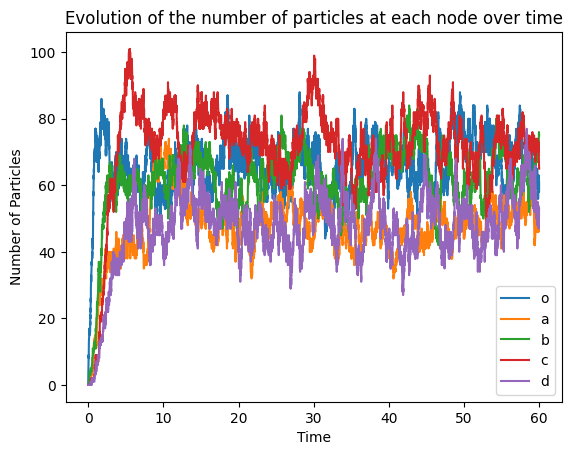

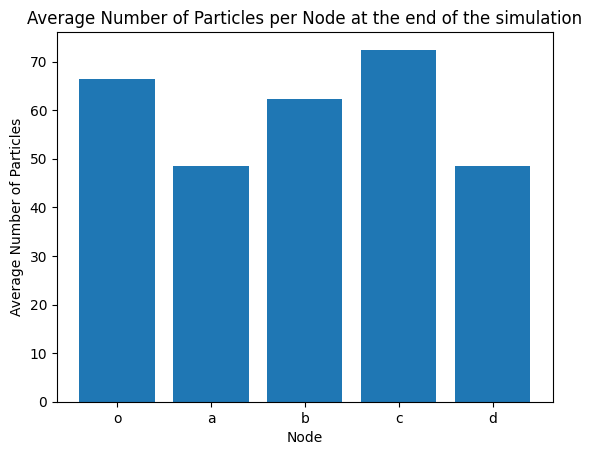

Average number per node :  [66.3271821  48.39820412 62.31477357 72.42316258 48.45642875]


In [12]:
from numpy.random import choice, rand 
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

Lambda = [
[0, 3/4, 3/4, 0, 0],
[0, 0, 1/4, 1/4, 2/4],
[0, 0, 0, 1, 0],
[0, 0, 0, 0, 1],
[0, 0, 0, 0, 0]]

# contruct the P matrix (instead of P_bar) and clock rates w
w = np.sum(Lambda, axis=1)
w[4] = 2
D = np.diag(w)
P = np.linalg.inv(D) @ Lambda

in_rate = 100
particles_fornode = [0, 0, 0, 0, 0] # The net starts empty
time = 0
time_points = []  # List of temporal points
particle_counts = []  # List of the number of particles for every node over time
while time < 60:
    time_points.append(time)
    particle_counts.append(particles_fornode.copy())
    
    # list of times for each node proportional to 1/(w[i]*Number of particles in the node)
    random_times = np.array([-np.log(np.random.rand()) / (w[i] * N) if N > 0 else np.inf for (i, N) in enumerate(particles_fornode)])
    
    # We take the minimum value and the node link to it, it means that the particle starts from that node
    # We can do that since P(X >= t + s | X >= t) = P(X >= s) for a Poisson Random variable X
    # In practice we take the node that activate the node first and then we reset
    # If the first clock that activates in the imput clock we insert a particle in the Graph
    random_time = min(list(enumerate(random_times)), key=lambda x: x[1]) #  ES : min ([(0,23),(1,40),(2,100)]) viewing the second argument
    random_time_input = -np.log(np.random.rand())/in_rate
    
    if random_time[1] < random_time_input:
        #update total time
        time += random_time[1]
        # subtract a particles from minimum time node
        particles_fornode[random_time[0]] -= 1
        # Compute the new position
        if random_time[0] != 4:
            newpos = np.random.choice(len(w), p= P[random_time[0]])
        # Update the number of particles of the node if the node is not d
            particles_fornode[newpos] += 1
        #print(random_time[0],newpos,particles_fornode)
    else:
        particles_fornode[0] += 1
        time += random_time_input
        #print("input",particles_fornode)

time_points = np.array(time_points)
particle_counts = np.array(particle_counts)
print(time)
node_order = ['o', 'a', 'b', 'c', 'd']

for i, node_name in enumerate(node_order):
    plt.plot(time_points, particle_counts[:, i], label=node_name)

plt.xlabel('Time')
plt.ylabel('Number of Particles')
plt.legend()
plt.title('Evolution of the number of particles at each node over time')
# Salva il grafico come immagine (puoi specificare il formato desiderato, ad esempio PNG, JPG, PDF, etc.)
#plt.savefig('evoluzione_particelle.png')
plt.show()

# Plot the histogram with the average number of particles per node at the end of the simulation
average_particles_per_node = {node_name: (particle_counts.sum(axis = 0)/(len(particle_counts)-1))[i] for i, node_name in enumerate(node_order)}
plt.bar(average_particles_per_node.keys(), average_particles_per_node.values())
plt.xlabel('Node')
plt.ylabel('Average Number of Particles')
plt.title('Average Number of Particles per Node at the end of the simulation')
plt.show()

print("Average number per node : ", particle_counts.sum(axis = 0)/(len(particle_counts)))

# 3.1.2
No blowing up because the clock times of the nodes depend by 1/N_particles and the input rate is fixed, every node will find its equilibrium for a number of particles. This not means that the particles in that node will stay constant but that they will move around an equilibrium position.

# 3.2.1

60.052291790983645


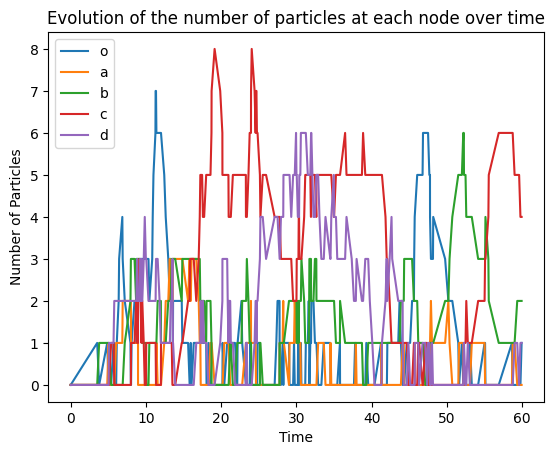

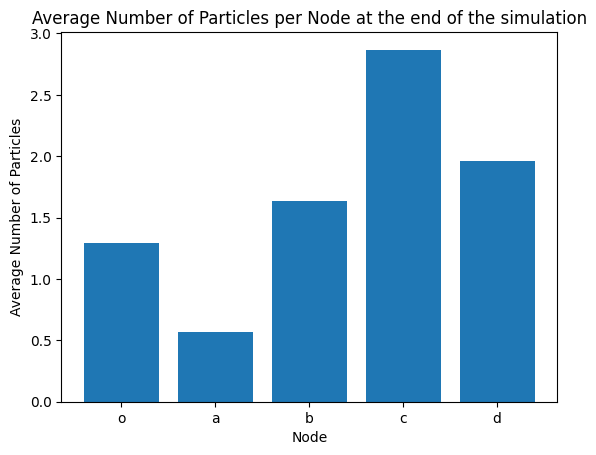

Average number per node :  [array([1.28676471, 0.56985294, 1.63235294, 2.85661765, 1.95220588])]


In [16]:
in_rate = 1
particles_fornode = [0, 0, 0, 0, 0]
time = 0
time_points = []  # List of temporal points
particle_counts = []  # List of the number of particles for every node over time

while time < 60:
    time_points.append(time)
    particle_counts.append(particles_fornode.copy())
    # list of times for each node proportional to 1/(w[i]*Number of particles in the node)
    random_times = np.array([-np.log(np.random.rand()) / w[i] if N > 0 else np.inf for (i, N) in enumerate(particles_fornode)])
    # We take the minimum value and the node link to it, it means that the particle starts from that node
    # We can do that since P(X >= t + s | X >= t) = P(X >= s) for a Poisson Random variable X
    # In practice we take the node that activate the node first and then we reset
    # If the first clock that activates in the imput clock we insert a particle in the Graph
    random_time = min(list(enumerate(random_times)), key=lambda x: x[1]) #  ES : min ([(0,23),(1,40),(2,100)])
    random_time_input = -np.log(np.random.rand())/in_rate
    if random_time[1] < random_time_input:
        #update total time
        time += random_time[1]
        # subtract a particles from minimum time node
        particles_fornode[random_time[0]] -= 1
        # Compute the new position
        if random_time[0] != 4:
            newpos = np.random.choice(len(w), p= P[random_time[0]])
        # Update the number of particles of the node
            particles_fornode[newpos] += 1
        #print(random_time[0],newpos,particles_fornode)
    else:
        particles_fornode[0] += 1
        time += random_time_input
        #print(random_time_input,newpos,particles_fornode)

time_points = np.array(time_points)
particle_counts = np.array(particle_counts)
print(time)
node_order = ['o', 'a', 'b', 'c', 'd']

for i, node_name in enumerate(node_order):
    plt.plot(time_points, particle_counts[:, i], label=node_name)

plt.xlabel('Time')
plt.ylabel('Number of Particles')
plt.legend()
plt.title('Evolution of the number of particles at each node over time')
# Salva il grafico come immagine (puoi specificare il formato desiderato, ad esempio PNG, JPG, PDF, etc.)
#plt.savefig('evoluzione_particelle_2_2.png')
plt.show()

# Plot the histogram with the average number of particles per node at the end of the simulation
average_particles_per_node = {node_name: (particle_counts.sum(axis = 0)/(len(particle_counts)-1))[i] for i, node_name in enumerate(node_order)}
plt.bar(average_particles_per_node.keys(), average_particles_per_node.values())
plt.xlabel('Node')
plt.ylabel('Average Number of Particles')
plt.title('Average Number of Particles per Node at the end of the simulation')
plt.show()

print("Average number per node : ", [particle_counts.sum(axis = 0)/(len(particle_counts))])

# 3.2.2
We approach this problem as an optimizazion problem, we want to find the maximum feasible flow in input that
don't let the network blow up, so the input flow must be equal to the output flow. For us the flow is an average frquency of particles that enter or leave a node.
Procedure: We know that for a random variable T -> ln(U)/r E[T] == 1/r. This means that for long times the avarage time of activation is 1/r, so the avarage flow(freequency) of particles is r.
Example node 'o': w['o'] = 1.5, this mens that, when the node have particles inside, it move 1.5 particles /s,
we can do this approzimation for the Law of large numbers.
How the node move the particles ? We use the probability row of 'o' - [0, 0.5, 0.5, 0, 0].
It means that 'o' will move on avarage 0.75 part/s in a and 0.75 part/s in b.
So for example is logic that the imput flow is < 1.5 for sure, beacouse the node 'o' can move max 1.5
Example node 'a': node 'a' receive particles only from 'o'. So it must be able to move 0.75 part/s on avarage and
we know it can beacouse w['a'] == 1.
Let's do this reasoning for all the network.


Optimal f: [1.33333333 0.66666667 0.66666667 0.16666667 0.16666667 0.33333333
 0.83333333 1.         1.33333333]
Max input rate 1.3333333331542268


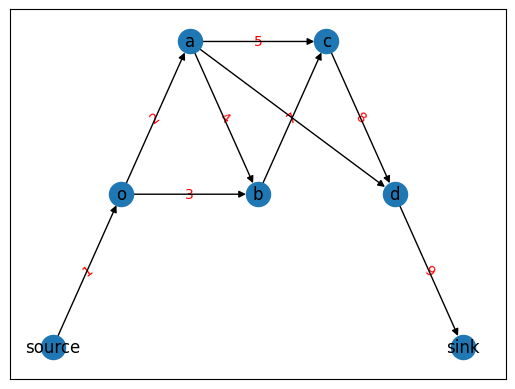

In [19]:
# Contruct the network for the graph
G = nx.DiGraph()
node_mapping = {0:'o',1:'a',2:'b',3:'c',4:'d'}
node = 0
for row in P:
    for index,el in enumerate(row):
        if el != 0:
            G.add_edge(node_mapping[node], node_mapping[index])
            G[node_mapping[node]][node_mapping[index]]['capacity'] = el*w[node]
    node += 1

            
G.add_edges_from([('source','o'),('d','sink')])
pos = {'source': (0, 0), 'o': (1, 1), 'a': (2, 2), 'b': (3, 1), 'c': (4, 2), 'd': (5, 1), 'sink': (6, 0)}
nx.draw_networkx_edge_labels(G,pos,edge_labels={('source','o'):'1',
('o','a'):'2',('o','b'):'3',('a','b'):'4',
('a','c'):'5', ('a','d'):'6', ('b','c'):'7', ('c','d'):'8', ('d','sink'):'9' },font_color='red')
nx.draw_networkx(G,pos, with_labels = True)

# We approach this problem as an optimizazion problem, we want to find the maximum feasible flow in input that
# don't let the network blow up, so the input flow must be equal to the output flow. For us the flow is an average frquency
# of particles that enter or leave a node.
# Procedure: We know that for a random variable T -> ln(U)/r E[T] == 1/r. This means that for long times the avarage time
# of activation is 1/r, so the avarage flow(freequency) of particles is r.
# Example node 'o': w['o'] = 1.5, this mens that, when the node have particles inside, it move 1.5 particles /s,
# we can do this approzimation for the Law of large numbers.
# How the node move the particles ? We use the probability row of 'o' - [0, 0.5, 0.5, 0, 0].
# It means that 'o' will move on avarage 0.75 part/s in a and 0.75 part/s in b.
# So for example is logic that the imput flow is < 1.5 for sure, beacouse the node 'o' can move max 1.5
# Example node 'a': node 'a' receive particles only from 'o'. So it must be able to move 0.75 part/s on avarage and
# we know it can beacouse w['a'] == 1.
# Let's do this reasoning for all the network
#Construct the optimization problem for the maximum input_flow
import cvxpy as cp
B = np.array([[1,0,0,0,0,0,0,0,0],
    [-1,1,1,0,0,0,0,0,0],
    [0,-1,0,1,1,1,0,0,0],
    [0,0,-1,-1,0,0,1,0,0],
    [0,0,0,0,-1,0,-1,1,0],
    [0,0,0,0,0,-1,0,-1,1],
    [0,0,0,0,0,0,0,0,-1]])
B_exit = np.array([[1,0,0,0,0,0,0,0,0],
    [0,1,1,0,0,0,0,0,0],
    [0,0,0,1,1,1,0,0,0],
    [0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,0,1],
    [0,0,0,0,0,0,0,0,0]])
n_edges = B.shape[1]

f = cp.Variable(n_edges)
objective = cp.Maximize(f[0])
constraints = [(B @ f)[1:-1] == np.array([0, 0, 0, 0, 0]), f >= 0, (B_exit @ f)[1:-1] <= w, f[1] == 0.5*f[0], f[2] == 0.5*f[0],
              f[3] == 0.25*f[1], f[4] == 0.25*f[1], f[5] == 0.5*f[1]]
prob = cp.Problem(objective, constraints)

# The correct function is `cp.Maximize` instead of `cp.Mazimize`
# The correct operator is `==` instead of `=`
# Also, `prob.solve()` should be used instead of `cvxpy.solve(prob)`
result = prob.solve(solver=cp.ECOS)

# The optimal value for f is stored in `f.value`.
print("Optimal f:", f.value)
print('Max input rate', f.value[0])